# Assignment Goals

Assignment 5 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

You need to submit a zip file in the usual format containing the following:

- PDF document explaining your solutions for each of the problems.  
  - At most one page outlining your overall approach: how have you defined the gradient descent function, what functions can it take as inputs, are there any restrictions on the type of function etc.
  - Not more than 1 page per problem.  Only explain anything that is not obvious.  Even a single line is acceptable if you have otherwise explained the overall approach before.  Explain your choice of starting point if relevant.
  - The doc for each problem should also contain an image showing the points you started with and how the convergence occurs.  For the 2-D images, you need to generate a 3-D plot.  Refer to the matplotlib documentation for this.
- Python code containing:
  - the functions below with the same names (`f1`, `f2` etc).
  - derivatives of the functions if not already given

In [1]:
import numpy as np
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from mpl_toolkits.mplot3d import Axes3D

In [2]:
def nDgradientdescent(f, fprime, xo, learning_rate, itermax=1e6, limits=None):
    x = np.array(xo)  # Initial starting point

    for i in range(int(itermax)):
        xnew = x - learning_rate * fprime(x)  # Forward propagation using Gradient Descent

        if limits is not None:
            xnew = np.clip(xnew, *zip(*limits))  # Clip values within specified limits
        x = xnew  # Update x
    return x

## Problem 1 - 1-D simple polynomial

In [3]:
def f1(x):
    return x ** 2 + 3 * x + 8
def f1prime(x):
    return 2 * x + 3

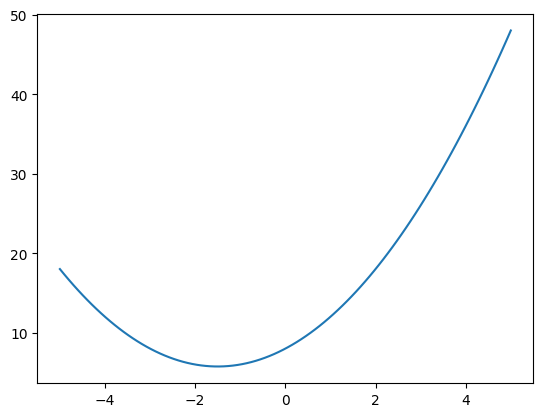

In [4]:
# Create the axis and function
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
plt.plot(xbase, ybase)

In [5]:
x= nDgradientdescent(f1, f1prime, [5], 0.001, limits=[(-5, 5)])
print(f'x= {x[0]}  y = {f1(x[0])}')

KeyboardInterrupt: 

MovieWriter Pillow unavailable; using Pillow instead.
C:\Users\KAMLESH\AppData\Local\Temp\ipykernel_10336\1913537747.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)


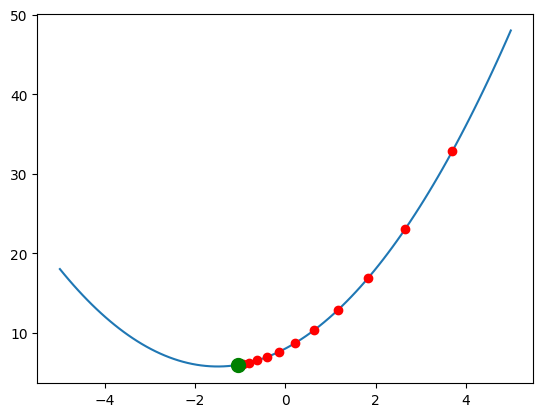

In [ ]:

# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 5
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def yprimefunc(x):
    return 2 * x + 3

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
ani.save('animation_1.gif', writer='Pillow')
plt.savefig('animation_1.png')

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [ ]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


In [ ]:
x= nDgradientdescent(f3, lambda x: np.array([df3_dx(x[0], x[1]), df3_dy(x[0], x[1])]), [4, 4], 0.001, limits=[xlim3, ylim3])
print(f'x = {x[0]}, y = {x[1]} f3(x, y) = {f3(x[0], x[1])}')


The optimized values are: x = 4.0, y = 2.2547356429626424 f(x, y) = 2.0648902477955744


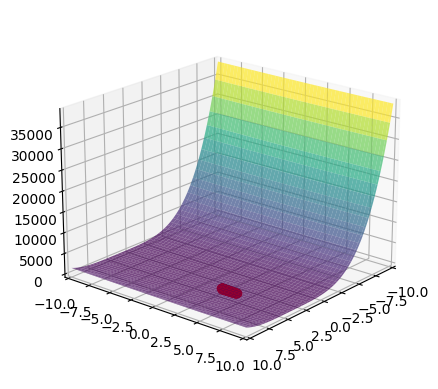

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the functions f3, df3_dx, and df3_dy (these should be defined in your code)

# Set up the optimization parameters
x = 4.0
y = 4.0
learning_rate = 0.01
num_iterations = 100

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
xall, yall = [], []
lnall, = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)

# Create a grid for plotting the function
x_grid = np.linspace(-10, 10, 100)
y_grid = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f3(X, Y)

# Create the surface plot of the function
surf = ax.plot_surface(X, Y,Z, cmap='viridis', alpha=0.7)

# Set up the rotation parameters
azim = 145
elev = 20

def update_view():
    ax.view_init(elev=elev, azim=azim)

def onestepderiv(frame):
    global x, y, azim, elev
    dx = df3_dx(x, y)
    dy = df3_dy(x, y)
    
    x -= learning_rate * dx
    y -= learning_rate * dy

    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(f3(x, y))
    
    # Increment the azimuthal angle to rotate the plot
    azim += 2.5
    update_view()

ani = FuncAnimation(fig, onestepderiv, frames=range(num_iterations), interval=100, repeat=False)
# Save the animation as a GIF using the "pillow" writer
ani.save('animation_2.gif', writer='pillow')

# Display the final
plt.savefig('animation_2.png')
print(f'The optimized values are: x = {x}, y = {y} f(x, y) = {f3(x, y)}')



## Problem 3 - 2-D function 

Derivatives and limits given. 

In [ ]:
xlim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)


In [ ]:
# import numpy as np

x = nDgradientdescent(f4, lambda x: np.array([df4_dx(x[0], x[1]), df4_dy(x[0], x[1])]), [-np.pi/2, 0], 0.001, limits=[(-(np.pi), (np.pi)), (-10, 10)])
print(f'x = {x[0]}, y = {x[1]} f3(x, y) = {f4(x[0], x[1])}')

-1.5707963267948966 -1.5707963267948966


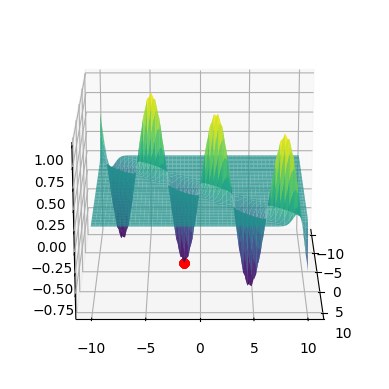

In [ ]:
x = -np.pi/2
y = -np.pi/2
learning_rate = 0.01

num_iterations = 100

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xall, yall, zall = [], [], []
lnall, = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)

# Create a grid for plotting the function
x_grid = np.linspace(-10, 10, 100)
y_grid = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f4(X, Y)

# Create the surface plot of the function
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

def onestepderiv(frame):
    global x, y
    dx = df4_dx(x, y)
    dy = df4_dy(x, y)
    
    x -= learning_rate * dx
    y -= learning_rate * dy

    xall.append(x)
    yall.append(y)
    zall.append(f4(x, y))
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
    ax.view_init(azim=frame, elev=20)
    

ani = FuncAnimation(fig, onestepderiv, frames=range(num_iterations), interval=100, repeat=False)
# Save the animation as a GIF using the "pillow" writer

ani.save('animation_3.gif', writer='pillow')

print(x, y)
# Display the animation
plt.savefig('animation_3.png')


## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [2]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1

def f5prime(x):
    return -4*np.sin(x)*np.cos(x)**3 - 3*np.cos(x)*np.sin(x)**2 - 8*np.cos(x)*np.sin(x) - np.sin(x)


In [ ]:
x= nDgradientdescent(f5, f5prime, [3], 0.01, limits=[(0, 2*np.pi)])
print(f'x= {x}, y = {f5(x)}')

x= [1.66166948], y = [-4.04541205]


C:\Users\KAMLESH\AppData\Local\Temp\ipykernel_23176\3521811262.py:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)


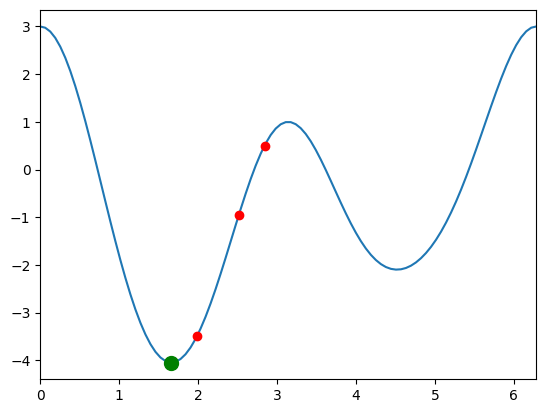

In [5]:

# Set up some large value for the best cost found so far
bestcost = 100000

# Learning rate
lr = 0.1

# Create a figure and axes for the plot
fig, ax = plt.subplots()
plt.xlim(0, 2*np.pi)
xb = np.linspace(0, 2 * np.pi, 100)
yb = f5(xb)
ax.plot(xb, yb)
xall, yall = [], []
lnall, = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Initial best x value
bestx = 3

# Define the function to update the plot in each frame
def update(frame):
    global bestcost, bestx, lr
    x = bestx - f5prime(bestx) * lr
    bestx = x
    y = f5(x)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    lngood.set_data(x, y)
    # return lnall, lngood
# Create an animation
ani = FuncAnimation(fig, update, frames=range(10), interval=1000, repeat=False)

# Save the animation as a GIF
ani.save('animation_4.gif', writer='pillow')

# Show the plot
plt.savefig('animation_4.png')